In [256]:
import csv
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori 
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules 

# Import data

In [212]:
path="C:\\Users\\omarb\\Documents\\Introduction to AI\\Jupyter\\Datasets\\"
df = pd.read_csv(path+"Market_Basket_Optimisation.csv",sep=',',header=None)
df.info()
df.isnull().sum() # Dataset seem already cleaned


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

# Preprocess

In [213]:
df =df.fillna('',axis=0)

In [214]:
data = np.array(df)
te=TransactionEncoder()
te_ary=te.fit(data).transform(data)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array


In [215]:
for i in df.columns:
    print(i)


 asparagus
almonds
antioxydant juice
asparagus
avocado
babies food
bacon
barbecue sauce
black tea
blueberries
body spray
bramble
brownies
bug spray
burger sauce
burgers
butter
cake
candy bars
carrots
cauliflower
cereals
champagne
chicken
chili
chocolate
chocolate bread
chutney
cider
clothes accessories
cookies
cooking oil
corn
cottage cheese
cream
dessert wine
eggplant
eggs
energy bar
energy drink
escalope
extra dark chocolate
flax seed
french fries
french wine
fresh bread
fresh tuna
fromage blanc
frozen smoothie
frozen vegetables
gluten free bar
grated cheese
green beans
green grapes
green tea
ground beef
gums
ham
hand protein bar
herb & pepper
honey
hot dogs
ketchup
light cream
light mayo
low fat yogurt
magazines
mashed potato
mayonnaise
meatballs
melons
milk
mineral water
mint
mint green tea
muffins
mushroom cream sauce
napkins
nonfat milk
oatmeal
oil
olive oil
pancakes
parmesan cheese
pasta
pepper
pet food
pickles
protein bar
red wine
rice
salad
salmon
salt
sandwich
shallot
shampo

In [216]:
df=df.drop(labels='',axis=1)

In [217]:
aspargus=pd.Series(df.asparagus | df[' asparagus'],name='aspargus')

In [218]:
df=df.drop(labels=[' asparagus','asparagus'],axis=1)

In [219]:
df = df.join(aspargus)
df.sort_index(axis=1,inplace=True)
df

,almonds,antioxydant juice,aspargus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:title={'center':'cookies'}>

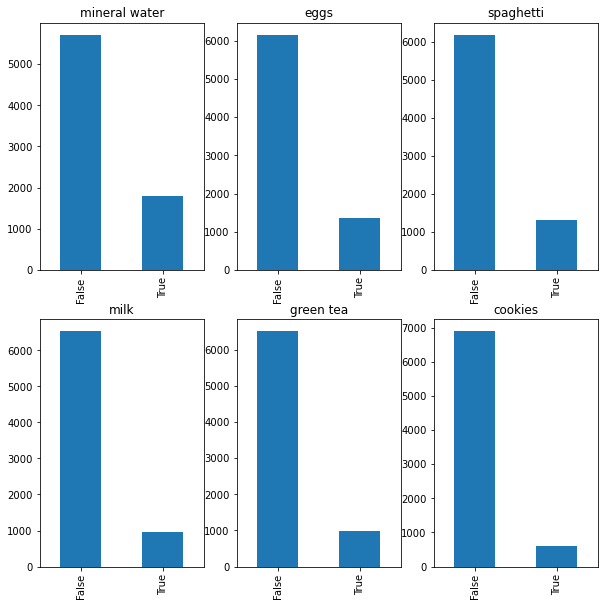

In [289]:
fig = plt.figure(figsize=(10,10)) 
fig_dims = (2, 3)

# Plot accidents depending on type
plt.subplot2grid(fig_dims, (0, 0))
df['mineral water'].value_counts().plot(kind='bar', 
                                     title='mineral water')
plt.subplot2grid(fig_dims, (0, 1))
df['eggs'].value_counts().plot(kind='bar', 
                                     title='eggs')
plt.subplot2grid(fig_dims, (0, 2))
df['spaghetti'].value_counts().plot(kind='bar', 
                                     title='spaghetti')
plt.subplot2grid(fig_dims, (1, 0))
df['milk'].value_counts().plot(kind='bar', 
                                     title='milk')
plt.subplot2grid(fig_dims, (1, 1))
df['green tea'].value_counts().plot(kind='bar', 
                                     title='green tea')
plt.subplot2grid(fig_dims, (1, 2))
df['cookies'].value_counts().plot(kind='bar', 
                                     title='cookies')



,almonds,antioxydant juice,aspargus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
12,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
18,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
28,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7397,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7401,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7467,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True


In [253]:
frequent_itemsets=apriori(df, min_support=0.08,use_colnames=True)
frequent_itemsets.sort_values(by='support',inplace=True,ascending=False)
frequent_itemsets

,support,itemsets
10,0.238368,(mineral water)
4,0.179709,(eggs)
12,0.174110,(spaghetti)
5,0.170911,(french fries)
2,0.163845,(chocolate)
7,0.132116,(green tea)
9,0.129583,(milk)
8,0.098254,(ground beef)
6,0.095321,(frozen vegetables)
11,0.095054,(pancakes)


In [303]:
rules = association_rules(frequent_itemsets,metric="lift",min_threshold=1)

In [304]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
